<a href="https://colab.research.google.com/github/eeuunnjjiii/Project/blob/main/n222a_random_forests_Copy3_ipynb_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 2*

# 📝 Assignment
---

# 랜덤포레스트(Random Forests)

### 1) 캐글 대회를 이어서 진행합니다. EDA, 데이터 전처리 부분을 업데이트 하세요.
- EDA는 항상 완벽할 수 없지요 한 주간 계속 같은 데이터로 과제를 진행하므로 부족한 부분을 추가하거나 논하세요.
- (지금은 feature engineering에 너무 시간을 들이지 마세요!)
- Ordinal Encoding을 적용해 보세요.
- **(객관식) 다음 특성들 중에 순서를 고려한 Ordinal Encoding이 필요해 보이는 특성을 선택하고 과제 제출폼에 제출하세요.**
    1. opinion_h1n1_vacc_effective
    2. state
    3. marital
    4. employment_occupation


Data fields

[targets]
vacc_h1n1_f - Whether respondent received H1N1 flu vaccine. (This is the target you need to predict for the competition)
vacc_seas_f - Whether respondent received seasonal flu vaccine.

[features]
For all binary variables: 0 = No; 1 = Yes. 
* h1n1_concern - Level of concern about the H1N1 flu.
* 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned. 
* h1n1_knowledge - Level of knowledge about H1N1 flu.
* 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

behavioral_antiviral_meds - Has taken antiviral medications. (binary)
behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
behavioral_face_mask - Has bought a face mask. (binary)
behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

health_insurance - Has health insurance. (binary)
health_worker - Is a healthcare worker. (binary)

opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness. 
* Not at all effective; Not very effective; Don't know; Somewhat effective; Very effective

opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine. 
* Very Low; Somewhat low; Don't know; Somewhat high; Very high
opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine. 
* Not at all worried; Not very worried; Don't know; Somewhat worried; Very worried
opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness. 
* Not at all effective; Not very effective; Don't know; Somewhat effective; Very effective
opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine. 
* Very Low; Somewhat low; Don't know; Somewhat high; Very high
opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine. 
* Not at all worried; Not very worried; Don't know; Somewhat worried; Very worried

agegrp - Age group of respondent. 
* 6 Months - 9 Years; 10 - 17 Years; 18 - 34 Years; 35 - 44 Years; 45 - 54 Years; 55 - 64 Years; 65+ Years
education_comp - Self-reported education level.
* 1 = < 12 Years; 2 = 12 Years; 3 = Some College; 4 = College Graduate
raceeth4_i - Race of respondent.
* 1 = Hispanic; 2 = Non-Hispanic, Black Only; 3 = Non-Hispanic, White Only; 4 = Non-Hispanic, Other or Multiple Races
sex_i - Sex of respondent.
* 1 = Male; 2 = Female 2
inc_pov - Household annual income of respondent with respect to 2008 Census poverty thresholds.
* 1 = > $75,000; 2 = <= $75,000; 3 = Below Poverty; 4 = Unknown
marital - Marital status of respondent.
* 1 = Married; 2 = Not Married
rent_own_r - Housing situation of respondent.
* 1 = Home is Owned; 2 = Home is Rented or Other Arrangement

employment_status - Employment status of respondent.
* Employed; Not in Labor Force; Unemployed
census_region - True census region of residence 
* 1=northeast; 2=midwest; 3=south; 4=west
census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

n_adult_r - Number of other adults in household.
household_children - Number of children in household.
n_people_r - Number of adults in the household.

employment_industry - Type of industry respondent is employed in.
employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.
hhs_region - HHS surveillance region number
Region 1: CT,ME,MA,NH,RI,VT
Region 2: NJ,NY
Region 3: DE,DC,MD,PA,VA,WV
Region 4: AL,FL,GA,KY,MS,NC,SC,TN
Region 5: IL,IN,MI,MN,OH,WI
Region 6: AR,LA,NM,OK,TX
Region 7: IA,KS,MO,NE
Region 8: CO,MT,ND,SD,UT,WY
Region 9: AZ,CA,HI,NV
Region 10: AK,ID,OR,WA
state - State of residence

In [1]:
import pandas as pd
target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [2]:
#결측치 처리 (numerical cols=mean, categorical cols=mode)
nu_cols=train[[ 'n_people_r', 'hhs_region',]]
ca_cols=train.drop(columns=nu_cols).columns

def missing_value(df):
    for i in nu_cols:
        df[i]=df[i].fillna(train[i].mean())
    for i in ca_cols:
        df[i]=df[i].fillna(df[i].mode()[0])
    return df

train=missing_value(train)

In [3]:
#train,val 데이터 나누기
from sklearn.model_selection import train_test_split
train,val = train_test_split(train,train_size=0.8,test_size=0.2)

train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [4]:
def engineer(df):
    
#cardinarity가 높은 state 제외
  #df=df.drop('state',axis=1)
    
#n_people_r = n_adult_r+household+_children이므로 n_people_r만 남기기
  df = df.drop('n_adult_r', axis = 1)
  df = df.drop('household_children', axis = 1)

#behaviorals 특성 추가
  behaviorals=[col for col in df.columns if 'behavior' in col]
  df['total_bhv']=df[behaviorals].sum(axis=1)
        
  return df

train = engineer(train)
val=engineer(val)
test = engineer(test)

In [5]:
#특성/타겟 분리

features=train.drop(target,axis=1).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

### 2) 랜덤포레스트 모델을 적용한 후의 결과를 캐글에 제출하세요.
- 랜덤포레스트를 적용하고 성능이 오히려 떨어졌을 수도 있습니다! 만약 그렇다면 이유를 본인 논리로 분석해 보세요.
- **캐글 Leaderboard의 본인 Score를 과제 제출폼에 제출하세요.**

In [7]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.2MB/s 


In [8]:
%%time
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.metrics import f1_score

#OneHotEncoder 사용
pipe_onehot=make_pipeline(OneHotEncoder(use_cat_names=True),
                   SimpleImputer(),
                   RandomForestClassifier(oob_score=True))

pipe_onehot.fit(X_train,y_train)
print('훈련 정확도 :', pipe_onehot.score(X_train,y_train))
print('OOB 정확도 :',pipe_onehot.named_steps['randomforestclassifier'].oob_score_)
print('검증 정확도 :', pipe_onehot.score(X_val,y_val))

y_train_pred=pipe_onehot.predict(X_train)
y_val_pred=pipe_onehot.predict(X_val)

print('훈련 f1 score', f1_score(y_train,y_train_pred))
print('검증 f1 score', f1_score(y_val,y_val_pred))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 : 0.9941582895946387
OOB 정확도 : 0.8036058476410758


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도 : 0.8076147550705729
훈련 f1 score 0.987752564501088
검증 f1 score 0.4863837872070931
CPU times: user 28.6 s, sys: 506 ms, total: 29.1 s
Wall time: 29.4 s


In [9]:
%%time

#OrdinalEncoder 사용
pipe_or=make_pipeline(OrdinalEncoder(),
                     SimpleImputer(),
                     RandomForestClassifier(oob_score=True))

pipe_or.fit(X_train,y_train)
print('훈련 정확도 :', pipe_or.score(X_train,y_train))
print('OOB 정확도 :',pipe_or.named_steps['randomforestclassifier'].oob_score_)
print('검증 정확도 :', pipe_or.score(X_val,y_val))

y_train_pred=pipe_or.predict(X_train)
y_val_pred=pipe_or.predict(X_val)

print('훈련 f1 score', f1_score(y_train,y_train_pred))
print('검증 f1 score', f1_score(y_val,y_val_pred))

훈련 정확도 : 0.9941879429469501
OOB 정확도 : 0.8043768348011743
검증 정확도 : 0.8082078045308979
훈련 f1 score 0.9878170064644456
검증 f1 score 0.5044437634079068
CPU times: user 9.17 s, sys: 85.3 ms, total: 9.25 s
Wall time: 9.28 s


In [10]:
#특성 수 비교
print('shape before: ', X_train.shape)

#OneHotEncoder
onehot=pipe_onehot.named_steps['onehotencoder']
onehot_e=onehot.transform(X_train)
print('OneHot shape :',onehot_e.shape)

#OrdinalEncoder
ordinal=pipe_or.named_steps['ordinalencoder']
ordinal_e=ordinal.transform(X_train)
print('Ordinal shape :', ordinal_e.shape)

shape before:  (33723, 37)
OneHot shape : (33723, 173)
Ordinal shape : (33723, 37)


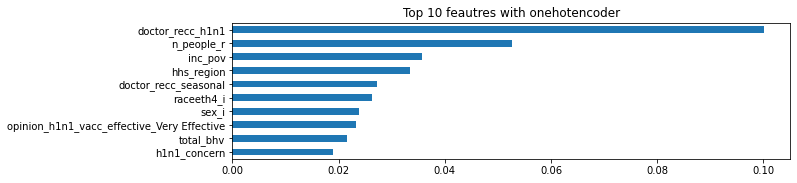

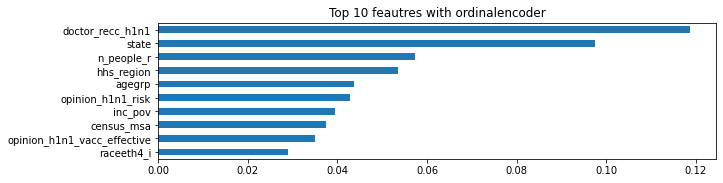

In [11]:
#특성 중요도 비교

import matplotlib.pyplot as plt

#OneHot
rf=pipe_onehot.named_steps['randomforestclassifier']
colnames=onehot.get_feature_names()
colvis=pd.Series(rf.feature_importances_, colnames)

#top 10 시각화
n=10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} feautres with onehotencoder')
colvis.sort_values()[-n:].plot.barh();

#Ordinal
rf_ord=pipe_or.named_steps['randomforestclassifier']
colvis_or=pd.Series(rf_ord.feature_importances_,X_train.columns)

#top 10 시각화
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} feautres with ordinalencoder')
colvis_or.sort_values()[-n:].plot.barh();

In [14]:
for i in range(5,10):
    print('max_depth=',i)
    pipe_or=make_pipeline(OrdinalEncoder(),
                       SimpleImputer(),
                       RandomForestClassifier(max_depth=i,oob_score=True))
    pipe_or.fit(X_train,y_train)

    y_train_pred=pipe_or.predict(X_train)
    y_val_pred=pipe_or.predict(X_val)
    
    print('훈련 정확도', pipe_or.score(X_train, y_train))
    print('검증 정확도', pipe_or.score(X_val, y_val))
    
    print('훈련 f1 score', f1_score(y_train,y_train_pred))
    print('검증 f1 score', f1_score(y_val,y_val_pred),'\n')


max_depth= 5
훈련 정확도 0.8014411529223379
검증 정확도 0.799074842841893
훈련 f1 score 0.4296422487223168
검증 f1 score 0.41786941580756015 

max_depth= 6
훈련 정확도 0.8050292085520268
검증 정확도 0.801209820899063
훈련 f1 score 0.46488158216000647
검증 f1 score 0.4435590969455511 

max_depth= 7
훈련 정확도 0.8141624410639623
검증 정확도 0.8098683430198078
훈련 f1 score 0.5137714330048879
검증 f1 score 0.4941621962764279 

max_depth= 8
훈련 정확도 0.8218426593126353
검증 정확도 0.8117661012928479
훈련 f1 score 0.5410937977390774
검증 f1 score 0.5054534122779683 

max_depth= 9
훈련 정확도 0.8301455979598493
검증 정확도 0.8137824694579527
훈련 f1 score 0.5702280912364945
검증 f1 score 0.5178132678132678 



In [15]:
#변수조절
pipe_or=make_pipeline(OrdinalEncoder(),
                       SimpleImputer(),
                       RandomForestClassifier(max_depth=7,oob_score=True))
pipe_or.fit(X_train,y_train)

y_train_pred=pipe_or.predict(X_train)
y_val_pred=pipe_or.predict(X_val)

print('훈련 f1 score', f1_score(y_train,y_train_pred))
print('검증 f1 score', f1_score(y_val,y_val_pred))


훈련 f1 score 0.5208221076129628
검증 f1 score 0.5037313432835822


In [16]:
y_test_pred=pipe_or.predict(X_test)
sample_submission['vacc_h1n1_f']=y_test_pred
sample_submission.to_csv('submission.csv',index=False)

## 🔥 도전과제

### 3) 수업에 사용하지 않은 다른 종류의 [category_encoders](http://contrib.scikit-learn.org/category_encoders/)을 적용해 보고 인코더에 대해 설명하세요


In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

## 참고자료

- [Random Forests for Complete Beginners](https://victorzhou.com/blog/intro-to-random-forests/)